In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

%matplotlib inline

# Reaction Time Data

Buid a predictive model that uses the reactionTime.csv dataset to predict reaction time on a button pressing task (participants are asked to press a button as soon as they see the screen change color) based on other variables in the dataset.

1. Explore your data
    - What does reaction time look like? Your chosen Predictor variables?
    - Why did you choose the predictors you did?
2. Build a Predictive Model
    - Standardize Continuous Variables
    - Choose a CV method and implement. Why did you choose that way?
3. Examine the accuracy of the model
    - What's the mean squared error? What does that mean?
    - What's the r2? What does that mean?


In [4]:
rt = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv")

rt.head()

,reactionTime,IQ,age,GPA,tiredness,timesincemeal
0,418.31,81.89,18,4.00,0.1832,193.44
1,662.72,104.16,19,3.47,0.9596,259.42
2,651.81,116.27,20,3.61,0.4976,272.02
3,614.09,64.81,22,4.00,0.3299,259.98
4,745.73,106.44,19,3.67,0.1830,283.74


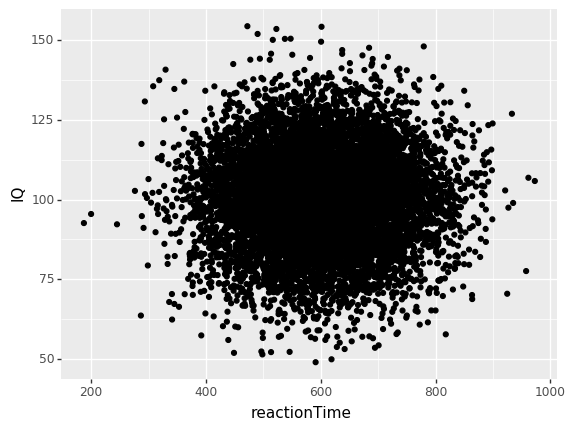

<ggplot: (313520333)>

In [6]:
#1

(ggplot(rt, aes("reactionTime", "IQ")) + geom_point())

In [7]:
#2
print(rt.shape)
#choosing k-fold, because I want to use every data point, but there's too many for me to want to do LOO just for times sake
# I'm using 10-fold because that gives me a solid test set size each time, but still leaves a lot of the data to build the model.
# if I had less data, I might use fewer folds.
kf = KFold(10)

X = rt[["IQ", "age", "GPA", "tiredness", "timesincemeal"]]
y = rt["reactionTime"]

r2 = []
lr = LinearRegression()

for train,test in kf.split(X):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y[train]
    y_test = y[test]
    
    z = StandardScaler()
    z.fit(X_train)
    Xz_train = z.transform(X_train)
    Xz_test = z.transform(X_test)
    
    lr.fit(Xz_train, y_train)
    r2.append(lr.score(Xz_test,y_test))
    

(10000, 6)
